## 11.2 Factorisation

This section illustrates further exhaustive search techniques with
a famous and important problem in number theory and cryptography:
given a positive integer _n_, compute all its positive integer
divisors (also called factors).
For example, the positive integer factors of 5 are 1 and 5, and
those of 10 are 1, 2, 5 and 10.

I start by writing the problem definition and some tests in Python.
To ease testing, I produce the factors in no particular order, as a set.

**Function**: factorisation\
**Inputs**: _n_, an integer\
**Preconditions**: _n_ > 0\
**Output**: _factors_, a set\
**Postconditions**: the members of _factors_ are all the
positive integer divisors of _n_

In [1]:
factorisation_tests = [
    # case,         n,  factors
    ('smallest n',  1,  {1}),
    ('2 factors',   2,  {1, 2}),
    ('3 factors',   25, {1, 5, 25}),
    ('4 factors',   10, {1, 2, 5, 10}),
    ('5+ factors',  40, {1, 2, 4, 10, 20, 40})
]

To apply brute-force search I must state the problem as
'find those candidates that satisfy these criteria'. For this problem
we must find those positive integers that divide _n_ without remainder.

<div class="alert alert-warning">
<strong>Note:</strong> To apply exhaustive search, rephrase the problem at hand
as a search problem.
</div>

### 11.2.1 Make candidates explicit

To obtain a brute-force search algorithm we must answer these questions:

- What are the candidates?
- How are they generated, one by one?
- How is each candidate tested?

The second question is very easy to answer if we have a collection of
candidates to iterate over but the input is a single integer.
We must first create a collection of candidates to apply linear search.

By rephrasing factorisation as a search problem, the candidates became
explicit: the positive integers. Unfortunately, there are
infinitely many of them, and the algorithm would never stop iterating.
For brute-force search to work, two conditions must be met:
the collection of candidates is finite and includes all solutions.
Can you think of a finite range of positive integers that
includes the factors of _n_?

___

The smallest positive integer is 1 and no number higher than _n_
divides _n_, so the integers from 1 to _n_ include all factors of _n_.

<div class="alert alert-warning">
<strong>Note:</strong> If the solutions are integers, determine the smallest and largest solutions to obtain a finite range of candidates.
</div>

Having a finite collection of candidates (1 to _n_), we turn to
the other two questions of how to generate and test each one.
Generating integers within a range is trivial with a for-loop.
Checking if a candidate is a solution, i.e. a divisor of _n_,
is also trivial with the modulo operation.

1. let _factors_ be the empty set
2. for each _candidate_ from 1 to _n_:
    1. if _n_ mod _candidate_ = 0:
        1. add _candidate_ to _factors_

What's the complexity of this algorithm?

___

The algorithm is a linear search over the integers from 1 to _n_ and
for each one executes two or three constant-time operations
(just step&nbsp;2.1 or also step&nbsp;2.1.1).
The best- and worst-case complexities are thus linear in _n_: Θ(_n_).

The code is a direct translation of the algorithm to Python.

In [2]:
%run -i ../m269_util

def factorisation(n: int) -> set:
    """Return all positive integer divisors of n.

    Preconditions: n > 0
    """
    factors = set()
    for candidate in range(1, n+1):
        if n % candidate == 0:
            factors.add(candidate)
    return factors

test(factorisation, factorisation_tests)

5+ factors FAILED: {1, 2, 4, 5, 8, 40, 10, 20} instead of {1, 2, 4, 40, 10, 20}
Tests finished.


The last test fails. It's easy to see why, because
the test function prints the actual and expected outputs:
I forgot two factors of 40.
I must replace the expected output of the last test.

In [3]:
factorisation_tests[-1] = ('5+ factors',  40, {1, 2, 4, 5, 8, 10, 20, 40})
test(factorisation, factorisation_tests)

Tests finished.


As explained [previously](../02_Sequence/02_5_maths_functions.ipynb#2.5.2-Algorithms),
an algorithm is correct if it produces an output that satisfies
the postconditions for each input that satisfies the preconditions.
To properly check the implementation of an algorithm,
every test must associate a valid input to a valid output;
otherwise the test itself is incorrect.
Here, the test is incorrect because 40&nbsp;satisfies the preconditions but
{1, 2, 4, 10, 20, 40} doesn't satisfy the postconditions: the set doesn't
contain all positive integer divisors of 40, it's missing two of them.

<div class="alert alert-warning">
<strong>Note:</strong> If the code fails a test, maybe the code is correct and the test isn't.
</div>

### 11.2.2 Compute solutions

Sometimes, once you find a solution, you can directly compute other
solutions from it and remove them from the candidates.
This reduces the remaining number of candidates to generate and test.
For this problem, if we have a factor _f_ of _n_,
then _n/f_ is the 'symmetric' factor, e.g. if 2 divides 10 then
10 / 2 = 5 also divides 10.

The algorithm must start with an explicit collection of candidates
so that the computed solutions can be removed from it.

1. let _factors_ be the empty set
1. let _candidates_ be {1, ..., _n_}
2. while _candidates_ isn't empty:
   1. remove some _candidate_ from _candidates_
   2. if _n_ mod _candidate_ = 0:
      1. add _candidate_ to _factors_
      2. add _n_ / _candidate_ to _factors_
      3. remove _n_ / _candidate_ from _candidates_

This algorithm is a linear search because
it iterates over a given collection, but contrary to a for-loop,
it goes through the candidates in no particular order.
I'll show you shortly how to implement step&nbsp;3.1 in Python.

What are the best- and worst-case complexities of this algorithm?
Assume step&nbsp;3.1 takes constant time.

___

All operations within the while-loop take constant time.
The number of iterations is either _n_&nbsp;/&nbsp;2 in the best case
(each iteration removes two factors) or _n_ in the worst case
(each iteration removes one factor).
The algorithm is thus linear in _n_ in the best and worst cases.

Step&nbsp;3.1 is implemented with Python's `set` method `pop()`, which
removes and returns an arbitrary set member.

In [4]:
def symmetric_factorisation(n: int) -> set:
    """Return all positive integer divisors of n.

    Preconditions: n > 0
    """
    factors = set()
    candidates = set(range(1, n+1))
    while len(candidates) > 0:
        candidate = candidates.pop()
        if n % candidate == 0:
            factors.add(candidate)
            factors.add(n / candidate)
            candidates.discard(n / candidate)
    return factors

test(symmetric_factorisation, factorisation_tests)

Tests finished.


### 11.2.3 Sort candidates

In [Section&nbsp;11.1.3](./11_1_linear.ipynb#Sorted-candidates)
you saw that sorting the products in store
allowed the linear search to stop early.
My first factorisation approach generates the factors in ascending
order, while the second computes some factors directly.
Let's try to combine both approaches and see if we can stop early
due to the sorted order of the candidates.

The combined algorithm tests candidates _f_ in ascending order
(1, 2, 3, ...) and, if they're a factor, adds _n_ / _f_ to _factors_.
As _f_ increases, _n_ / _f_ decreases (_n_/1, _n_/2, _n_/3, ...),
so we can stop when _f_ = _n_ / _f_. If the algorithm continues
increasing _f_ beyond that point, then it will only find the
same factors that were already computed.
When _f_ = _n_ / _f_ we have *f*² = _n_ or _f_ = $\sqrt{n}$.
The square root may be a real number, not an integer, so
we must round it down and stop at _f_ = floor($\sqrt{n}$).

To sum up, by generating candidates in ascending order and by
computing the symmetric factors, we can stop much earlier:
at the floor of the square root of _n_.
Most programming languages have a function named `sqrt` to compute the square
root, so we'll use it in algorithms, instead of typesetting the root symbol.

1. let _factors_ be the empty set
2. for each _candidate_ from 1 to floor(sqrt(_n_)):
   2. if _n_ mod _candidate_ = 0:
      1. add _candidate_ to _factors_
      2. add _n_ / _candidate_ to _factors_

Python's `sqrt` function is in the `math` module.

In [5]:
import math

def root_factorisation(n: int) -> set:
    """Return all positive integer divisors of n.

    Preconditions: n > 0
    """
    factors = set()
    for candidate in range(1, math.floor(math.sqrt(n)) + 1):
        if n % candidate == 0:
            factors.add(candidate)
            factors.add(n / candidate)
    return factors

test(root_factorisation, factorisation_tests)

Tests finished.


The complexity of this algorithm is Θ($\sqrt{n}$).
This is a vast improvement. Imagine _n_ is one million.
The original algorithm does one million iterations but
this one only executes a thousand!

The new algorithm isn't just faster: it copes much better with a growing input.
The larger the input, the larger the run-time reduction,
compared to the full linear search from 1 to _n_.
A picture shows it better. (You don't need to understand this code.)

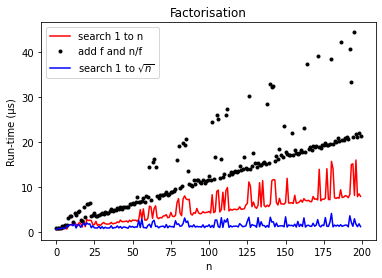

In [6]:
from matplotlib.pyplot import plot,xlabel,ylabel,title,legend,show
%matplotlib inline

n_values = []               # the values for n
linear_times = []           # normal factorisation
symmetric_times = []        # symmetric factorisation
root_times = []             # root factorisation
for n in range(200):
    n_values.append(n)

    run_times = %timeit -qo -r 3 -n 100 factorisation(n)
    linear_times.append(run_times.best * 1e6)

    run_times = %timeit -qo -r 3 -n 100 symmetric_factorisation(n)
    symmetric_times.append(run_times.best * 1e6)

    run_times = %timeit -qo -r 3 -n 100 root_factorisation(n)
    root_times.append(run_times.best * 1e6)

plot(n_values, linear_times, 'r-', label='search 1 to n')
plot(n_values, symmetric_times, 'k.', label='add f and n/f')
plot(n_values, root_times,'b-', label='search 1 to $\sqrt{n}$')
title('Factorisation')
xlabel('n')
ylabel('Run-time (µs)')
legend()
show()

The basic linear search from 1 to _n_ (Section&nbsp;11.2.1) and
the linear search that computes solution _n_ / _f_ (Section&nbsp;11.2.2)
have linear complexity (the run-times form straight upward lines), but
the latter takes much longer, even though it makes fewer iterations, because
it uses an additional set with the candidates yet to test.
The operations within each iteration take much longer to execute.

<div class="alert alert-warning">
<strong>Note:</strong> Algorithms with the same complexity may have very different run-times.
</div>

The linear search up to $\sqrt{n}$ (Ssection&nbsp;11.2.3) seems to have
constant complexity (a horizontal line) because it runs much faster
than the other two and so the time growth is too small to see.
If you comment out all code related to `linear_times` and `symmetric_times`,
to only compute and plot the `root_times`, then you will see they also grow.

The number of factors varies for consecutive values of _n_.
This leads to 'spikes' in all run-times because the more factors there are,
the more time is spent adding them to the solution set.

### 11.2.4 Prime numbers

To finish this section, here's a similar problem for practice.

A positive integer _n_ is prime if and only if it has exactly two
different positive integer factors, e.g. 1 and 4 aren't prime but 2 is.
Given a positive integer _n_, decide whether it's prime.

#### Exercise 11.2.1

Is `len(factorisation(n)) == 2` an efficient way of solving the problem?

_Write your answer here._

[Answer](../32_Answers/Answers_11_2_01.ipynb)

#### Exercise 11.2.2

Sketch a more efficient algorithm to decide if _n_ is prime.

_Write your answer here._

[Hint](../31_Hints/Hints_11_2_02.ipynb)
[Answer](../32_Answers/Answers_11_2_02.ipynb)

#### Exercise 11.2.3 (optional)

Implement your algorithm. Write a docstring and add tests.

In [7]:
%run -i ../m269_util
import math

def is_prime(n: int) -> bool:
    pass

prime_tests = [
    # case,         n,      is_prime
    ('smallest n',  1,      False),
    ('even prime',  2,      True),
    ('n = 4',       4,      False)
]

test(is_prime, prime_tests)

⟵ [Previous section](11_1_linear.ipynb) | [Up](11-introduction.ipynb) | [Next section](11_3_constraints.ipynb) ⟶